In [34]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [35]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

start()
del start

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [156]:
# https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-05-07
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-07/student_teacher_ratio.csv')
df

,edulit_ind,indicator,country_code,country,year,student_ratio,flag_codes,flags
0,PTRHC_2,Lower Secondary Educa...,MRT,Mauritania,2013,56.5939,NaN,NaN
1,PTRHC_2,Lower Secondary Educa...,MRT,Mauritania,2014,51.9469,NaN,NaN
2,PTRHC_2,Lower Secondary Educa...,MRT,Mauritania,2015,53.2272,NaN,NaN
3,PTRHC_2,Lower Secondary Educa...,MRT,Mauritania,2016,38.1892,NaN,NaN
4,PTRHC_1,Primary Education,COD,Democratic Republic o...,2012,34.7476,NaN,NaN
5,PTRHC_1,Primary Education,COD,Democratic Republic o...,2013,37.0692,NaN,NaN
6,PTRHC_1,Primary Education,COD,Democratic Republic o...,2014,35.3194,NaN,NaN
...,...,...,...,...,...,...,...,...
5182,PTRHC_3,Upper Secondary Educa...,COK,Cook Islands,2016,5.5140,NaN,NaN
5183,PTRHC_2,Lower Secondary Educa...,AZE,Azerbaijan,2016,6.9377,NaN,NaN


### Explore the Column Values

In [68]:
df['flag_codes'].value_counts(dropna=False)
df['flags'].value_counts(dropna=False)
df['year'].value_counts(dropna=False)
df['indicator'].value_counts(dropna=False)
df['country_code'].value_counts(dropna=False)

NaN    4185
‡       656
a       325
+        23
Name: flag_codes, dtype: int64

NaN                        4185
UIS Estimation              656
Category not applicable     325
National Estimation          23
Name: flags, dtype: int64

2015    921
2016    917
2014    913
2012    887
2013    880
2017    635
2018     36
Name: year, dtype: int64

Primary Education                        1029
Secondary Education                       840
Pre-Primary Education                     837
Lower Secondary Education                 739
Upper Secondary Education                 700
Tertiary Education                        550
Post-Secondary Non-Tertiary Education     494
Name: indicator, dtype: int64

AUT    42
UZB    42
MAC    42
VAT    42
GHA    40
MEX    39
MDA    39
       ..
SMR     3
MHL     2
FSM     2
PLW     2
IRL     1
TKM     1
NGA     1
Name: country_code, dtype: int64

In [ ]:
# sns.distplot(merged_ratings[merged_ratings['numVotes'] > 1000]['numVotes'], kde=False)

# sns.jointplot(x="numVotes", y="averageRating", data=merged_ratings);

In [ ]:
# sns.distplot(merged_ratings['averageRating'], kde=False)

In [69]:
_df = (df[(df['indicator'] == 'Primary Education') & (df['year'] == 2015)][['country', 'country_code', 'student_ratio']][~df['student_ratio'].isnull()].sort_values('student_ratio'))
_sliced_df = pd.concat([_df.head(10), _df.tail(10)])

/Users/richardsharrott/dev/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Histogram Plot of Student Ratio

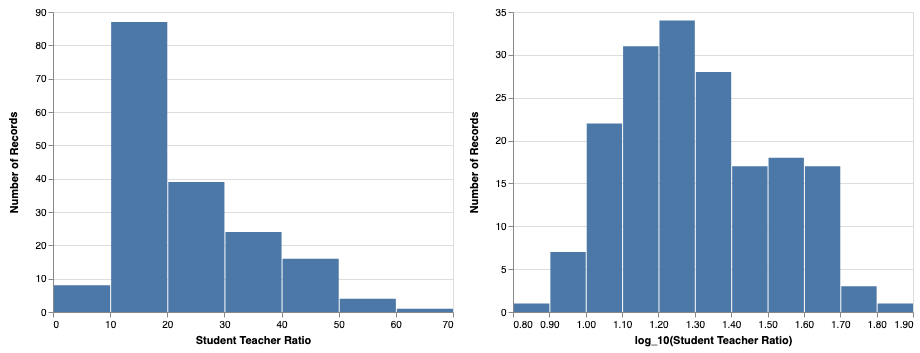

In [117]:
chart = alt.Chart(_df).mark_bar().encode(
    x=alt.X("student_ratio:Q", title='Student Teacher Ratio', bin=True),
    y='count()'
)

chart_log = alt.Chart(_df).transform_calculate(
    log_student_ratio = 'log(datum.student_ratio)/log(10)'
).mark_bar().encode(
    x=alt.X('log_student_ratio:Q', bin=True, title='log_10(Student Teacher Ratio)'),
    y='count()'
)

chart | chart_log

### Bar Plot of Highest and Lowest Student Teacher Ratios

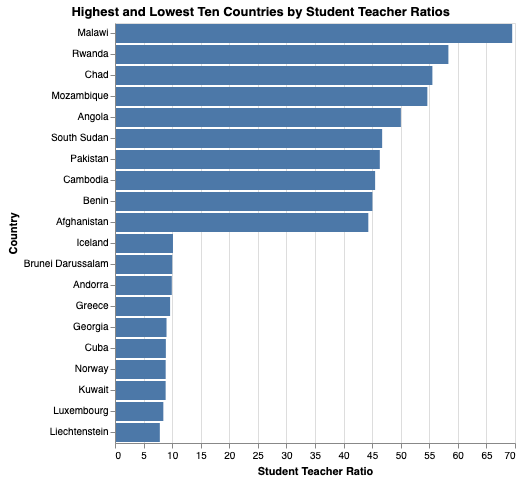

In [70]:
chart = alt.Chart(_sliced_df).mark_bar().encode(
    x=alt.X("student_ratio:Q", title='Student Teacher Ratio'),
    y=alt.Y(
        'country:N',
        sort=alt.EncodingSortField(
            field="student_ratio",  # The field to use for the sort
            op="sum",  # The operation to run on the field prior to sorting
            order="descending"  # The order to sort in
        ),
        title='Country'
    )
).properties(
    title='Highest and Lowest Ten Countries by Student Teacher Ratios'
)

chart

In [71]:
wdi_df = pd.read_csv('../WDI_csv/WDIData.csv')

In [72]:
gdp_2015_df = wdi_df[wdi_df['Indicator Code'] == 'NY.GDP.PCAP.CD'][['Country Code', '2015']]  # NY.GDP.PCAP.CD - GDP per capita in US$

In [77]:
merged_df = pd.merge(_df, gdp_2015_df, left_on=['country_code'], right_on=['Country Code'])

In [78]:
merged_df

,country,country_code,student_ratio,Country Code,2015
0,Liechtenstein,LIE,7.8452,LIE,167290.9400
1,Luxembourg,LUX,8.4577,LUX,100428.3680
2,Kuwait,KWT,8.8623,KWT,29869.5294
3,Norway,NOR,8.8686,NOR,74521.5699
4,Cuba,CUB,8.8992,CUB,7694.0119
5,Georgia,GEO,9.0166,GEO,3756.3838
6,Greece,GRC,9.6436,GRC,18167.7737
...,...,...,...,...,...
135,Pakistan,PAK,46.3406,PAK,1356.6677
136,South Sudan,SSD,46.7503,SSD,1154.8009


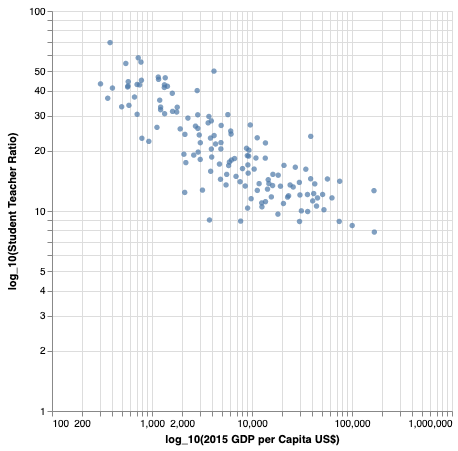

In [130]:
chart_log = alt.Chart(merged_df).mark_circle().encode(
    x=alt.X('2015:Q', scale=alt.Scale(type='log', base=10), title='log_10(2015 GDP per Capita US$)'),
    y=alt.Y('student_ratio:Q', scale=alt.Scale(type='log', base=10), title='log_10(Student Teacher Ratio)'),
    tooltip=['country', 'country_code', 'student_ratio', '2015']
)

chart_log.properties(height=400, width=400)

#### Results
- GDP per Capita and Student Teacher Ratio are negatively correlated

In [131]:
pop_2015_df = wdi_df[wdi_df['Indicator Code'] == 'SP.POP.TOTL'][['Country Code', '2015']]  # SP.POP.TOTL - Total Population

,Country Code,2015
1142,ARB,3.9603e+08
2741,CSS,7.2222e+06
4340,CEB,1.0326e+08
5939,EAR,3.1228e+09
7538,EAS,2.2829e+09
9137,EAP,2.0382e+09
10736,TEA,2.0130e+09
...,...,...
412085,VEN,3.0082e+07
413684,VNM,9.2677e+07


In [134]:
pop_merged_df = pd.merge(merged_df, pop_2015_df, on=['Country Code'], suffixes=('_gdp', '_population'))
pop_merged_df

,country,country_code,student_ratio,Country Code,2015_gdp,2015_population
0,Liechtenstein,LIE,7.8452,LIE,167290.9400,3.7470e+04
1,Luxembourg,LUX,8.4577,LUX,100428.3680,5.6960e+05
2,Kuwait,KWT,8.8623,KWT,29869.5294,3.8356e+06
3,Norway,NOR,8.8686,NOR,74521.5699,5.1886e+06
4,Cuba,CUB,8.8992,CUB,7694.0119,1.1325e+07
5,Georgia,GEO,9.0166,GEO,3756.3838,3.7253e+06
6,Greece,GRC,9.6436,GRC,18167.7737,1.0821e+07
...,...,...,...,...,...,...
135,Pakistan,PAK,46.3406,PAK,1356.6677,1.9943e+08
136,South Sudan,SSD,46.7503,SSD,1154.8009,1.0716e+07


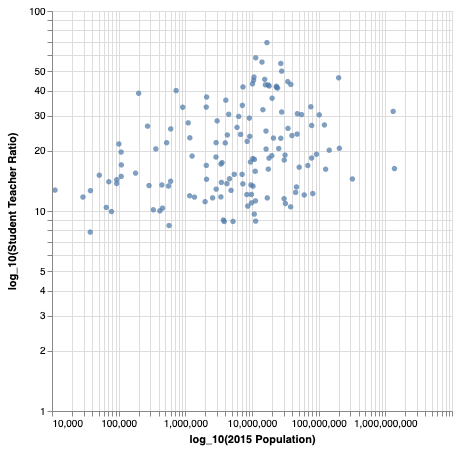

In [135]:
# Not sure if I should use log scale here

chart_log_pop = alt.Chart(pop_merged_df).mark_circle().encode(
    x=alt.X('2015_population:Q', scale=alt.Scale(type='log', base=10), title='log_10(2015 Population)'),
    y=alt.Y('student_ratio:Q', scale=alt.Scale(type='log', base=10), title='log_10(Student Teacher Ratio)'),
    tooltip=['country', 'country_code', 'student_ratio', '2015_population']
)

chart_log_pop.properties(height=400, width=400)

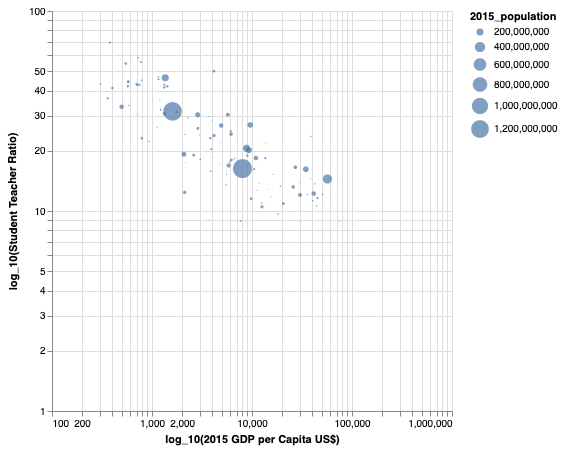

In [139]:
chart_log = alt.Chart(pop_merged_df).mark_circle().encode(
    x=alt.X('2015_gdp:Q', scale=alt.Scale(type='log', base=10), title='log_10(2015 GDP per Capita US$)'),
    y=alt.Y('student_ratio:Q', scale=alt.Scale(type='log', base=10), title='log_10(Student Teacher Ratio)'),
    size='2015_population:Q',
    tooltip=['country', 'country_code', 'student_ratio', '2015_gdp', '2015_population']
).interactive()

chart_log.properties(height=400, width=400)

In [ ]:
# TODO: Merge on region

In [141]:
wdi_country_df = pd.read_csv('../WDI_csv/WDICountry.csv')
wdi_country_df

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Carib...,High income,AW,2000,NaN,Value added at basic ...,NaN,NaN,Country uses the 1993...,NaN,2011,BPM5 (Converted into ...,NaN,General trade system,NaN,Enhanced General Data...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afgh...,AF,Afghan afghani,NaN,South Asia,Low income,AF,2002/03,NaN,Value added at basic ...,IDA,HIPC,Country uses the 1993...,NaN,NaN,BPM6,Actual,General trade system,Consolidated central ...,Enhanced General Data...,1979,Demographic and Healt...,Integrated household ...,NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of ...,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic ...,IBRD,NaN,Country uses the 1993...,1991–96,2011,BPM6,Actual,Special trade system,Budgetary central gov...,Enhanced General Data...,2014,Demographic and Healt...,Integrated household ...,NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained cons...,2010,Value added at basic ...,IBRD,NaN,Country uses the 2008...,NaN,Rolling,BPM6,Actual,Special trade system,Consolidated central ...,Enhanced General Data...,2011,Demographic and Healt...,Living Standards Meas...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,2000,NaN,Value added at basic ...,NaN,NaN,Country uses the 1993...,NaN,NaN,NaN,NaN,General trade system,NaN,NaN,2011. Population data...,NaN,NaN,Yes,NaN,NaN,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate....,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,NaN,Middle East & North A...,High income,AE,2010,NaN,Value added at produc...,NaN,NaN,Country uses the 1993...,NaN,2011,NaN,NaN,Special trade system,Consolidated central ...,Enhanced General Data...,2010,"World Health Survey, ...",NaN,NaN,2012,1985.0,2017.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,WLD,World,World,World,1W,NaN,World aggregate.,NaN,NaN,1W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
257,WSM,Samoa,Samoa,Samoa,WS,Samoan tala,Fiscal year ends on J...,East Asia & Pacific,Upper middle income,WS,2009,NaN,Value added at produc...,IDA,NaN,Country uses the 1993...,NaN,2011 (household consu...,BPM6,Actual,General trade system,Budgetary central gov...,Enhanced General Data...,2016,Samoa Demographic and...,Expenditure survey/bu...,NaN,2009,NaN,2017.0,NaN


In [144]:
pop_reg_merged_df = pd.merge(pop_merged_df, wdi_country_df[['Country Code', 'Region']], on=['Country Code'])
pop_reg_merged_df

,country,country_code,student_ratio,Country Code,2015_gdp,2015_population,Region
0,Liechtenstein,LIE,7.8452,LIE,167290.9400,3.7470e+04,Europe & Central Asia
1,Luxembourg,LUX,8.4577,LUX,100428.3680,5.6960e+05,Europe & Central Asia
2,Kuwait,KWT,8.8623,KWT,29869.5294,3.8356e+06,Middle East & North A...
3,Norway,NOR,8.8686,NOR,74521.5699,5.1886e+06,Europe & Central Asia
4,Cuba,CUB,8.8992,CUB,7694.0119,1.1325e+07,Latin America & Carib...
5,Georgia,GEO,9.0166,GEO,3756.3838,3.7253e+06,Europe & Central Asia
6,Greece,GRC,9.6436,GRC,18167.7737,1.0821e+07,Europe & Central Asia
...,...,...,...,...,...,...,...
135,Pakistan,PAK,46.3406,PAK,1356.6677,1.9943e+08,South Asia
136,South Sudan,SSD,46.7503,SSD,1154.8009,1.0716e+07,Sub-Saharan Africa


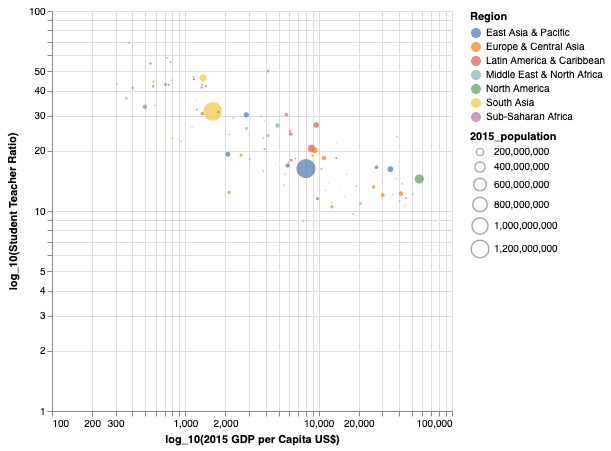

In [154]:
large_df = pop_reg_merged_df.sort_values('2015_population', ascending=False)[:100]

chart_log = alt.Chart(large_df).mark_circle().encode(
    x=alt.X('2015_gdp:Q', scale=alt.Scale(type='log', base=10), title='log_10(2015 GDP per Capita US$)'),
    y=alt.Y('student_ratio:Q', scale=alt.Scale(type='log', base=10), title='log_10(Student Teacher Ratio)'),
    size='2015_population:Q',
    color='Region:N',
    tooltip=['country', 'country_code', 'Region', 'student_ratio', '2015_gdp', '2015_population']
).interactive()

chart_log.properties(height=400, width=400)

In [155]:
# Primary vs Secondary S/T Ratios